In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,recall_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\psagv\\Downloads\\milknew[152].csv")

In [4]:
df1 = pd.read_csv("C:\\Users\\psagv\\Downloads\\monthly-milk-production.csv")

In [5]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [6]:
df1.head()

,Month,Milk Production
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0


In [7]:
df.shape

(1059, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [9]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [10]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [11]:
categorical = ['Taste' ,'Odor','Fat','Turbidity','Grade']
numerical = ['pH', 'Temprature', 'Colour']

In [12]:
print('Grade : ', df['Grade'].unique())

Grade :  ['high' 'low' 'medium']


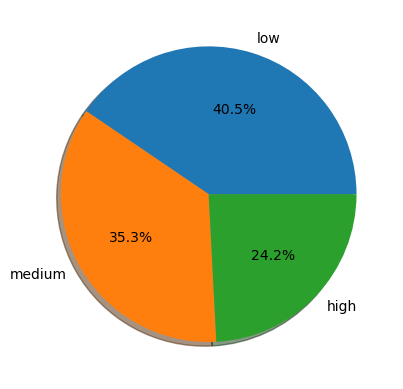

In [13]:
plt.pie(df['Grade'].value_counts(), labels = df['Grade'].value_counts().index, shadow = True, autopct = "%1.1f%%")
plt.show()

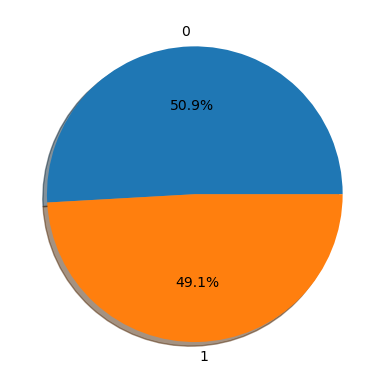

In [14]:
plt.pie(df['Turbidity'].value_counts(), labels = df['Turbidity'].value_counts().index, shadow = True, autopct = "%1.1f%%")
plt.show()

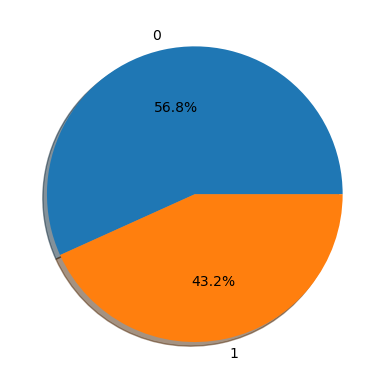

In [15]:
plt.pie(df['Odor'].value_counts(), labels = df['Odor'].value_counts().index, shadow = True, autopct = "%1.1f%%")
plt.show()

In [16]:
le=LabelEncoder() #creating an isntance of LabelEncoder class
grade = le.fit_transform(df['Grade'])
df['Grade'] = grade

In [17]:
df.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

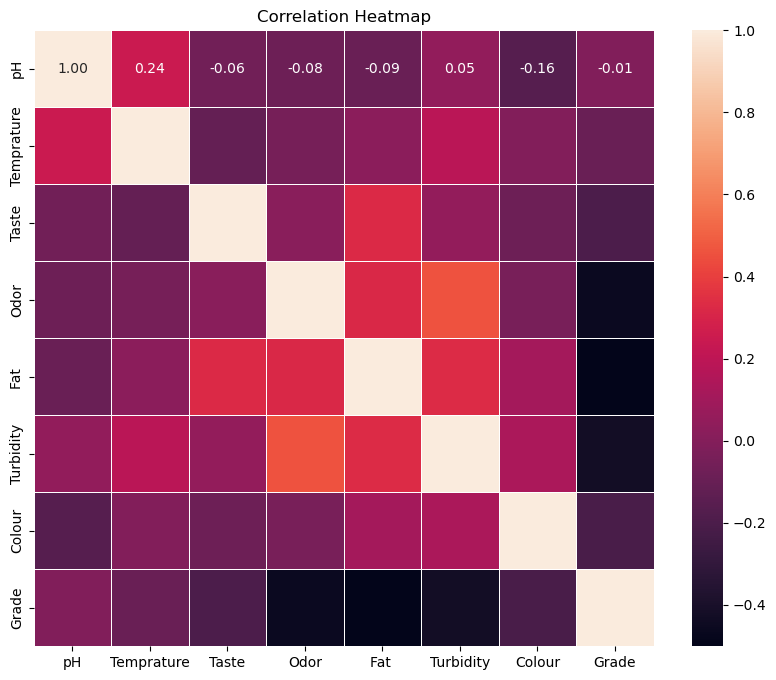

In [18]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'pH Vs Grade')

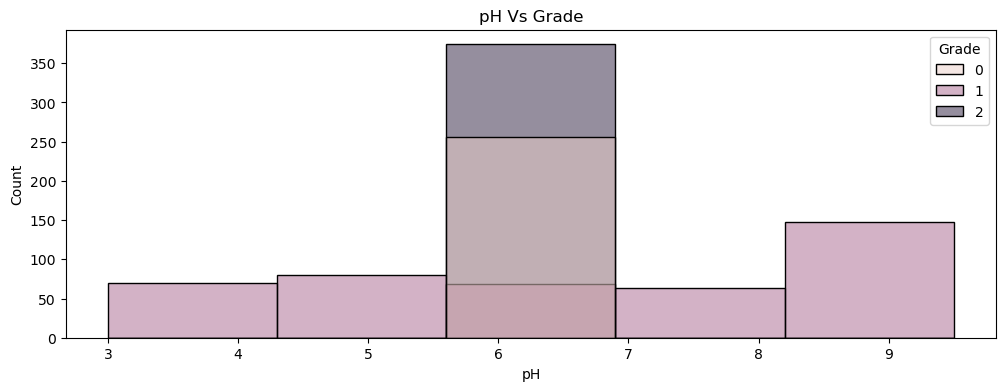

In [19]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='pH', data=df, hue='Grade', bins=5)
pl.set_title('pH Vs Grade')

Text(0.5, 1.0, 'Temprature vs Grade')

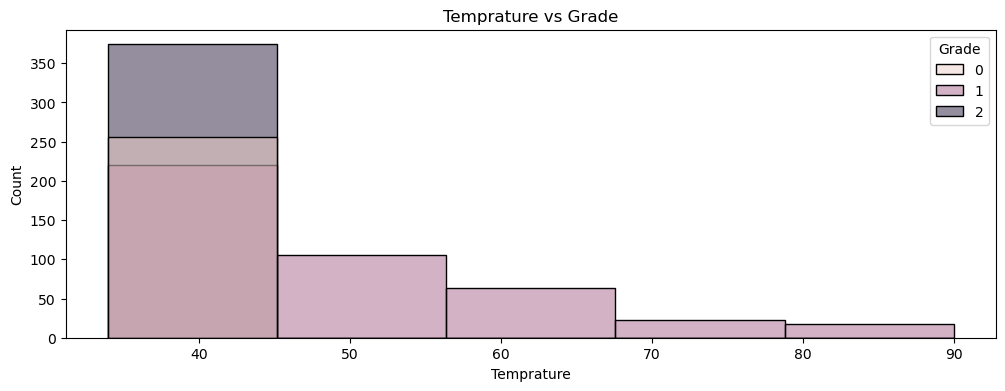

In [20]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='Temprature', data=df, hue='Grade', bins=5)
pl.set_title('Temprature vs Grade')

Text(0.5, 1.0, 'Odor vs Grade')

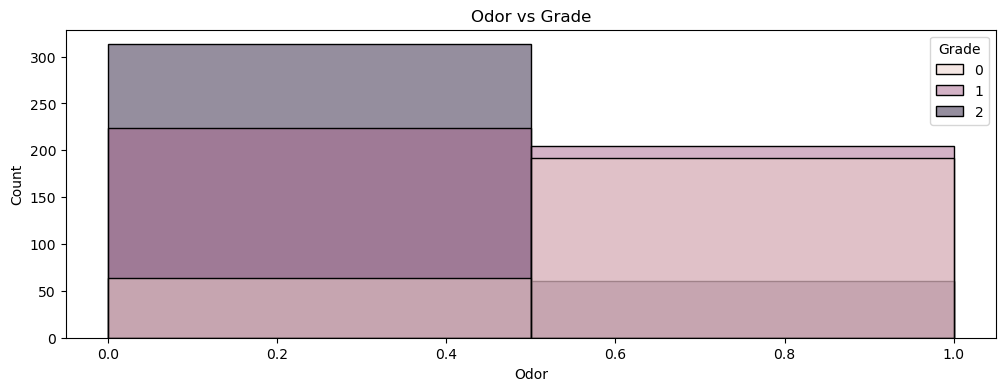

In [21]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='Odor', data=df, hue='Grade', bins=2)
pl.set_title('Odor vs Grade')

In [22]:
data1 = df.copy()
X = df.drop('Grade', axis = 1)
Y = df['Grade']
Y = pd.DataFrame(Y)

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 10)
X1, Y1 = smote.fit_resample(X, Y)

In [24]:
Y.value_counts()

Grade
1        429
2        374
0        256
Name: count, dtype: int64

In [25]:
Y1 = pd.DataFrame(Y1)
X1 = pd.DataFrame(X1)
Y1.value_counts()

Grade
0        429
1        429
2        429
Name: count, dtype: int64

In [26]:
X1

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1282,6.7,45,1,1,1,0,245
1283,6.6,38,0,0,0,0,255
1284,6.8,34,0,0,0,1,240
1285,6.5,37,0,0,0,0,255


In [27]:
Y1

,Grade
0,0
1,0
2,1
3,1
4,2
...,...
1282,2
1283,2
1284,2
1285,2


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=0.2 ,random_state = 105)

In [29]:
Y_train.value_counts()

Grade
2        352
1        345
0        332
Name: count, dtype: int64

Naive Bayes

In [30]:
NB = GaussianNB()
NB.fit(X_train, Y_train)
Y_pred_NB = NB.predict(X_test)
NB_accuracy = accuracy_score(Y_test,Y_pred_NB)
print(NB_accuracy*100,'%')

CM = confusion_matrix(Y_test, Y_pred_NB)
print("\nConfusion Matrix: \n", CM)

89.92248062015504 %

Confusion Matrix: 
 [[97  0  0]
 [ 5 75  4]
 [17  0 60]]


In [31]:
print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        97
           1       1.00      0.89      0.94        84
           2       0.94      0.78      0.85        77

    accuracy                           0.90       258
   macro avg       0.92      0.89      0.90       258
weighted avg       0.91      0.90      0.90       258



In [32]:
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

specificity = 1.0


Logistic Regression

In [33]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
Y_Res_LR=LR.predict(X_test)
LR_Accuracy = accuracy_score(Y_test, Y_Res_LR)
print(LR_Accuracy*100,'%')

75.96899224806202 %


In [34]:
CM = confusion_matrix(Y_test, Y_Res_LR)
print(CM)

[[69  7 21]
 [11 65  8]
 [10  5 62]]


In [35]:
print(classification_report(Y_test, Y_Res_LR))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        97
           1       0.84      0.77      0.81        84
           2       0.68      0.81      0.74        77

    accuracy                           0.76       258
   macro avg       0.76      0.76      0.76       258
weighted avg       0.77      0.76      0.76       258

specificity = 0.9078947368421053


Decision Tree Classifier

In [36]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [37]:
print(DTC.feature_importances_)
print(X_train.columns)

[0.49401083 0.17240634 0.00053178 0.01262287 0.208822   0.08887881
 0.02272736]
Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'], dtype='object')


In [38]:
Y_pred_DTC = DTC.predict(X_test)
DTC_Accuracy = accuracy_score(Y_test, Y_pred_DTC)
print(DTC_Accuracy*100,'%')

99.6124031007752 %


In [39]:
CM = confusion_matrix(Y_test, Y_pred_DTC)
print(CM)

[[97  0  0]
 [ 0 84  0]
 [ 1  0 76]]


In [40]:
print(classification_report(Y_test, Y_pred_DTC))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        97
           1       1.00      1.00      1.00        84
           2       1.00      0.99      0.99        77

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



KNN

In [41]:
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train,Y_train)
Y_Res_KNN=KNN_clf.predict(X_test)
KNN_Accuracy = accuracy_score(Y_test, Y_Res_KNN)
print(KNN_Accuracy*100,'%')

100.0 %


In [42]:
CM = confusion_matrix(Y_test, Y_Res_KNN)
print(CM)

[[97  0  0]
 [ 0 84  0]
 [ 0  0 77]]


In [43]:
print(classification_report(Y_test, Y_Res_KNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        77

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



AdaBoost Classifier

In [44]:
ADC = AdaBoostClassifier()
ADC.fit(X_train,Y_train)
Y_pred_ADC = ADC.predict(X_test)
ADC_Accuracy = accuracy_score(Y_test,Y_pred_ADC)
print(ADC_Accuracy*100,"%")

89.14728682170544 %


In [45]:
CM = confusion_matrix(Y_test, Y_pred_ADC)
print(CM)

[[76  0 21]
 [ 0 84  0]
 [ 7  0 70]]


In [46]:
print(classification_report(Y_test, Y_pred_ADC))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84        97
           1       1.00      1.00      1.00        84
           2       0.77      0.91      0.83        77

    accuracy                           0.89       258
   macro avg       0.89      0.90      0.89       258
weighted avg       0.90      0.89      0.89       258



Random Forest Classifier¶

In [47]:
RF = RandomForestClassifier(n_estimators=1000, random_state=47 , n_jobs = 3)
RF.fit(X_train,Y_train)
Y_Res_RF=RF.predict(X_test)
RF_Accuracy = accuracy_score(Y_test, Y_Res_RF)
print(RF_Accuracy*100,'%')

100.0 %


In [48]:
CM = confusion_matrix(Y_test, Y_Res_RF)

In [49]:
print(classification_report(Y_test, Y_Res_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        77

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



In [50]:
print("Naive Bayes = ",round(NB_accuracy*100,2))
print("Logistic_Regression = ",round(LR_Accuracy*100,2))
print("Decision_tree =",round(DTC_Accuracy*100,2))
print("K Nearest Neighbor =",round(KNN_Accuracy*100,2))
print("AdaBoost = ",round(ADC_Accuracy*100,2))
print("Random Forest Classifier = ",round(RF_Accuracy*100,2))

Naive Bayes =  89.92
Logistic_Regression =  75.97
Decision_tree = 99.61
K Nearest Neighbor = 100.0
AdaBoost =  89.15
Random Forest Classifier =  100.0
